In [1]:
# importing data from csv file
# the data is from the link https://data.mendeley.com/datasets/7wpcv7kp6f/1/files/f9030f7a-ca0b-48e3-94dc-664fc2522dd7
import pandas as pd
data = pd.read_csv('./graphs_on_demo/hospitals.csv')
data.head()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


In [2]:
"""
    This is an attempt to automate the process of finding the number of columns and rows in a dataframe and also the number of numeric values in each column.
"""
#importing libraries
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# finding numbers in the dataframe
print("The number of columns in your data is: " + str(len(data.columns)))
print("The number of rows in your data is: " + str(len(data)))

# def find columns with string values (if you find at least one string value, then the column is string type)

col_string_indexes = []
col_numeric_indexes = []

for col in data.columns:
    if is_numeric_dtype(data[col]):
        col_numeric_indexes.append(data.columns.get_loc(col))
    else:
        col_string_indexes.append(data.columns.get_loc(col))
print("The columns with string values are: " + str(col_string_indexes))
print ("The columns with numeric values are: " + str(col_numeric_indexes))

The number of columns in your data is: 24
The number of rows in your data is: 4772
The columns with string values are: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23]
The columns with numeric values are: [4, 12, 15, 18, 21]


In [3]:
# converting strings to interger
from sklearn.preprocessing import LabelBinarizer
import numpy

print ("Copying the data")
data_edited = data.copy()

print ("starting the conversion on the copied data")
for i in range(0, len(data_edited.columns)):
    if i in col_string_indexes:
        print("Converting column: " + str(i))
        array_of_ohe = LabelBinarizer().fit_transform(data_edited.iloc[:,i])
        print("Obtained the array of one hot encoded values")
        print ("The shape of the array is: " + str(array_of_ohe.shape))
        watch_var=[]
        print ("Starting the loop")
        for j in range(0, array_of_ohe.shape[0]):
            watch_var.append(numpy.where(array_of_ohe[j,:] == 1)[0][0])
        data_edited[data_edited.columns[i]] = watch_var
data_edited.head()

Copying the data
starting the conversion on the copied data
Converting column: 0
Obtained the array of one hot encoded values
The shape of the array is: (4772, 4589)
Starting the loop
Converting column: 1
Obtained the array of one hot encoded values
The shape of the array is: (4772, 2929)
Starting the loop
Converting column: 2
Obtained the array of one hot encoded values
The shape of the array is: (4772, 56)
Starting the loop
Converting column: 3
Obtained the array of one hot encoded values
The shape of the array is: (4772, 5)
Starting the loop
Converting column: 5
Obtained the array of one hot encoded values
The shape of the array is: (4772, 4)
Starting the loop
Converting column: 6
Obtained the array of one hot encoded values
The shape of the array is: (4772, 4)
Starting the loop
Converting column: 7
Obtained the array of one hot encoded values
The shape of the array is: (4772, 4)
Starting the loop
Converting column: 8
Obtained the array of one hot encoded values
The shape of the arr

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,3659,694,1,1,2,1,0,1,1,3,...,0,17041,0,0,18281,0,0,25812,0,1
1,2214,262,1,1,1,1,1,1,3,0,...,0,15819,3,0,15614,3,2,22747,0,0
2,1113,870,1,1,3,1,0,0,1,3,...,0,16334,0,0,17371,0,0,24491,0,1
3,2573,1917,1,2,1,3,3,1,1,1,...,3,14541,0,2,15226,3,2,23472,0,0
4,934,1515,1,3,4,3,2,0,2,3,...,3,13767,0,2,14341,0,2,0,2,3


In [4]:
from sklearn import preprocessing
# normalizing each column in data_edited
x = data_edited.iloc[:,1:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalized = pd.DataFrame(x_scaled)
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.237022,0.018182,0.25,0.500000,0.333333,0.000000,0.333333,0.333333,1.000000,0.0,...,0.0,0.759065,0.0,0.000000,0.673929,0.0,0.000000,0.606685,0.000000,0.333333
1,0.089481,0.018182,0.25,0.333333,0.333333,0.333333,0.333333,1.000000,0.000000,0.0,...,0.0,0.704633,1.0,0.000000,0.575610,1.0,0.666667,0.534645,0.000000,0.000000
2,0.297131,0.018182,0.25,0.666667,0.333333,0.000000,0.000000,0.333333,1.000000,0.0,...,0.0,0.727572,0.0,0.000000,0.640382,0.0,0.000000,0.575636,0.000000,0.333333
3,0.654713,0.018182,0.50,0.333333,1.000000,1.000000,0.333333,0.333333,0.333333,0.0,...,1.0,0.647706,0.0,0.666667,0.561306,1.0,0.666667,0.551685,0.000000,0.000000
4,0.517418,0.018182,0.75,0.833333,1.000000,0.666667,0.000000,0.666667,1.000000,0.0,...,1.0,0.613229,0.0,0.666667,0.528681,0.0,0.666667,0.000000,0.666667,1.000000


In [5]:
# PCA
from sklearn.decomposition import PCA
import numpy as np

data_norm_numpy = data_normalized.to_numpy()
pca = PCA(n_components=len(data_norm_numpy[0,:]))
output_pca = pca.fit(data_norm_numpy)
output_pca_transformed = pca.fit_transform(data_norm_numpy)

print ("The explained variance ratio is: " + str(output_pca.explained_variance_ratio_))
# print ("The singular values are: " + str(output_pca.singular_values_))
# print ("The components are: " + str(output_pca.components_))
# print ("The mean is: " + str(output_pca.mean_))
# print ("The number of components is: " + str(output_pca.n_components_))
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_edited.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

print ("The dictionary is: " + str(dic))

The explained variance ratio is: [0.36099042 0.11265113 0.06571597 0.05599029 0.05039128 0.04281375
 0.04040165 0.03614079 0.03152322 0.03026301 0.02930564 0.02696072
 0.02485716 0.02395045 0.01845705 0.0147855  0.01032553 0.00945035
 0.00528101 0.00404784 0.00287693 0.00158649 0.00123384]
The dictionary is: {'PC0': 'Procedure.Heart Attack.Quality', 'PC1': 'Procedure.Heart Failure.Quality', 'PC2': 'Procedure.Hip Knee.Quality', 'PC3': 'Rating.Effectiveness', 'PC4': 'Rating.Readmission', 'PC5': 'Procedure.Pneumonia.Quality', 'PC6': 'Rating.Safety', 'PC7': 'Rating.Timeliness', 'PC8': 'Facility.Name', 'PC9': 'Facility.Name', 'PC10': 'Facility.City', 'PC11': 'Rating.Mortality', 'PC12': 'Facility.State', 'PC13': 'Rating.Experience', 'PC14': 'Procedure.Pneumonia.Cost', 'PC15': 'Facility.Type', 'PC16': 'Procedure.Heart Failure.Cost', 'PC17': 'Procedure.Hip Knee.Cost', 'PC18': 'Procedure.Heart Failure.Value', 'PC19': 'Procedure.Heart Attack.Quality', 'PC20': 'Procedure.Heart Attack.Value', 'PC2

The shape of the output_pca_transformed is: (4772, 23)
[ 2 23]
The shape of xs is: (4772,)
The shape of ys is: (4772,)
The number of components is: 23
Unique colors are: 169


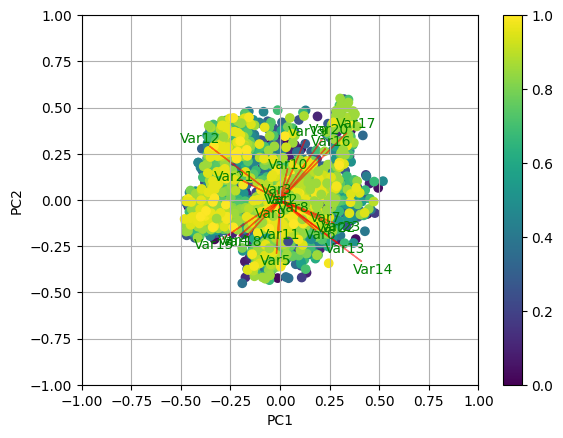

In [6]:
#watching details of the PCA
import matplotlib.pyplot as plt

# creating array of colors
colors_array_int = data_edited.iloc[:,2].to_numpy()
colors_array_float = colors_array_int.astype(float)/colors_array_int.max()
colors_array_seq = [plt.cm.viridis(elem) for elem in colors_array_float]

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    print ("The shape of xs is: " + str(xs.shape))
    print ("The shape of ys is: " + str(ys.shape))
    n = coeff.shape[0]
    print("The number of components is: " + str(n))
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    print ("Unique colors are: " + str(len(np.unique(colors_array_seq))))
    plt.scatter(xs * scalex, ys * scaley, c = colors_array_seq)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
print ("The shape of the output_pca_transformed is: " + str(output_pca_transformed.shape))
print (np.transpose(pca.components_[0:2, :].shape))
myplot(output_pca_transformed[:,1:3],np.transpose(pca.components_[0:2, :]))
plt.colorbar()
plt.show()

The shape of the first feature is: (4772,)


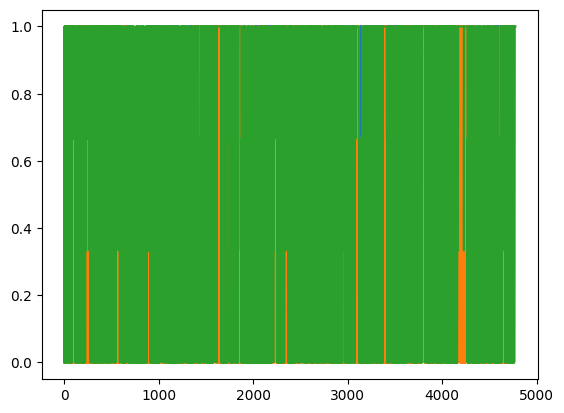

In [7]:
import matplotlib.pyplot as plt

# plotting the most important features in the PCA
first_feature = data_normalized.iloc[:,most_important[0]].to_numpy()
print ("The shape of the first feature is: " + str(first_feature.shape))
plt.plot(first_feature)
second_feature = data_normalized.iloc[:,most_important[1]].to_numpy()
plt.plot(second_feature)
third_feature = data_normalized.iloc[:,most_important[2]].to_numpy()
plt.plot(third_feature)


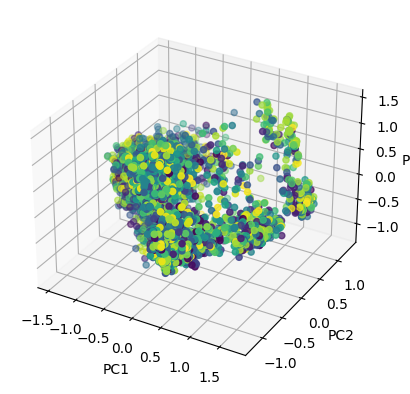

In [8]:
ax = plt.axes(projection='3d')
ax.scatter(output_pca_transformed[:,0], output_pca_transformed[:,1], output_pca_transformed[:,2], c = colors_array_seq)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [27]:
#building the simplicial complex
import gudhi as gd
import networkx as nx

skeleton = gd.RipsComplex(points = output_pca_transformed[1:100,0:2], max_edge_length = 0.1)
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 3)
print ("type of Rips_simplex_tree_sample is: " + str(type(skeleton)))
print ("The number of simplices is: " + str(Rips_simplex_tree_sample.num_simplices()))
print ("The num of vertices is: " + str(Rips_simplex_tree_sample.num_vertices()))
print ("The dimension is: " + str(Rips_simplex_tree_sample.dimension()))
fmt = '%s -> %.4f'
file = open("output.txt", "w")
for filtered_value in Rips_simplex_tree_sample.get_filtration():
    print(fmt % tuple(filtered_value))
    file.write(fmt % tuple(filtered_value))
    file.write("\n")
file.close()

type of Rips_simplex_tree_sample is: <class 'gudhi.rips_complex.RipsComplex'>
The number of simplices is: 455
The num of vertices is: 99
The dimension is: 3
[0] -> 0.0000
[1] -> 0.0000
[2] -> 0.0000
[3] -> 0.0000
[4] -> 0.0000
[5] -> 0.0000
[6] -> 0.0000
[7] -> 0.0000
[8] -> 0.0000
[9] -> 0.0000
[10] -> 0.0000
[11] -> 0.0000
[12] -> 0.0000
[13] -> 0.0000
[14] -> 0.0000
[15] -> 0.0000
[16] -> 0.0000
[17] -> 0.0000
[18] -> 0.0000
[19] -> 0.0000
[20] -> 0.0000
[21] -> 0.0000
[22] -> 0.0000
[23] -> 0.0000
[24] -> 0.0000
[25] -> 0.0000
[26] -> 0.0000
[27] -> 0.0000
[28] -> 0.0000
[29] -> 0.0000
[30] -> 0.0000
[31] -> 0.0000
[32] -> 0.0000
[33] -> 0.0000
[34] -> 0.0000
[35] -> 0.0000
[36] -> 0.0000
[37] -> 0.0000
[38] -> 0.0000
[39] -> 0.0000
[40] -> 0.0000
[41] -> 0.0000
[42] -> 0.0000
[43] -> 0.0000
[44] -> 0.0000
[45] -> 0.0000
[46] -> 0.0000
[47] -> 0.0000
[48] -> 0.0000
[49] -> 0.0000
[50] -> 0.0000
[51] -> 0.0000
[52] -> 0.0000
[53] -> 0.0000
[54] -> 0.0000
[55] -> 0.0000
[56] -> 0.000

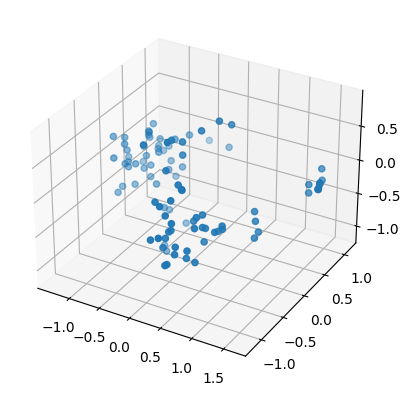

<AxesSubplot: title={'center': 'Persistence barcode'}>

<Figure size 640x480 with 0 Axes>

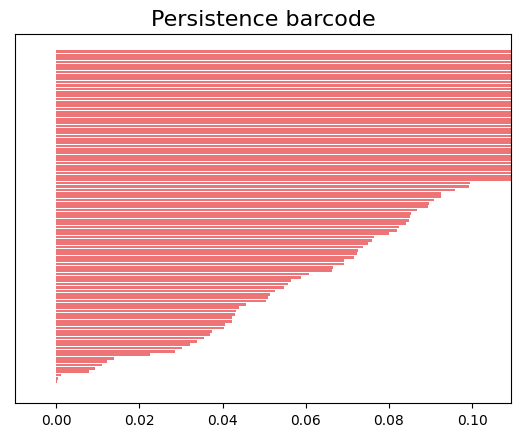

In [25]:
ax = plt.axes(projection='3d')
points_selected = 300 #number of points to be selected
ax.scatter(output_pca_transformed[:100,0], output_pca_transformed[:100,1], output_pca_transformed[:100,2])
plt.show()
plt.figure()
gd.plot_persistence_barcode(Rips_simplex_tree_sample.persistence())

In [40]:
import plotly.graph_objects as go
import plotly.express as px
points_selected = 300 #number of points to be selected
x, y, z = output_pca_transformed[:points_selected,0], output_pca_transformed[:points_selected,1], output_pca_transformed[:points_selected,2]

#fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50)])

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, alphahull=5, opacity=0.4, color='cyan')])
df = pd.DataFrame(data=output_pca_transformed[:points_selected,0:2])
fig.show()
#fig = px.scatter_3d(pd.DataFrame(data=output_pca_transformed[:,0:2]))
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers')])
fig.show()


In [35]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [12]:
# building the graph for pytorch geometric
